# Analisando os dados já tratados

## Importando os dados e bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
encoding = 'latin_1'

In [3]:
ipdm = pd.read_csv('dados_limpos/ipdm.csv', sep=';', encoding=encoding)
grupos_populacao = pd.read_csv('dados_limpos/grupos_populacao.csv', sep=';', encoding=encoding)
pib = pd.read_csv('dados_limpos/pib.csv', sep=';', encoding=encoding)

## Analisando o IPDM dos 10 municípios mais populosos

In [4]:
grupos_populacao.head()

,cod_ibge,municipio,ano,grupos_cod,grupos,populacao
0,3500105,Adamantina,2014,2,Médio,33862
1,3500105,Adamantina,2016,3,Alto,33882
2,3500105,Adamantina,2018,3,Alto,33888
3,3500105,Adamantina,2020,3,Alto,33894
4,3500105,Adamantina,2021,3,Alto,33869


In [5]:
codigo_municipios = grupos_populacao.groupby('cod_ibge')['populacao'].sum().sort_values(ascending=False)[0:10].index.tolist()
nome_municipios = grupos_populacao.groupby('municipio')['populacao'].sum().sort_values(ascending=False)[0:10].index.tolist()
codigo_municipios

[3550308,
 3518800,
 3509502,
 3548708,
 3549904,
 3547809,
 3534401,
 3543402,
 3552205,
 3529401]

In [6]:
ipdm.head()

,cod_ibge,Municipio,Valor,Ano,Tipo,Valor_Estado,Indicador1,Indicador2,Indicador3,Indicador4,Indicador5
0,3500105,Adamantina,0.548,2014,IPDM,0.535,,,,,
1,3500105,Adamantina,0.554,2016,IPDM,0.555,,,,,
2,3500105,Adamantina,0.560,2018,IPDM,0.578,,,,,
3,3500105,Adamantina,0.594,2020,IPDM,0.585,,,,,
4,3500105,Adamantina,0.566,2021,IPDM,0.561,,,,,


In [7]:
ultimo_ano = ipdm['Ano'].max()
ultimo_ano

2021

In [8]:
valor_estado = ipdm.query(f'Ano == {ultimo_ano}').iloc[0]['Valor_Estado']
valor_estado

0.561

In [9]:
filtro = (ipdm['Ano'] == ultimo_ano) & (ipdm['Tipo'] == 'IPDM') & (ipdm['cod_ibge'].isin(codigo_municipios))
top_10_mais_populosos = ipdm[filtro].sort_values('Valor')
top_10_mais_populosos.reset_index(drop=True, inplace=True)

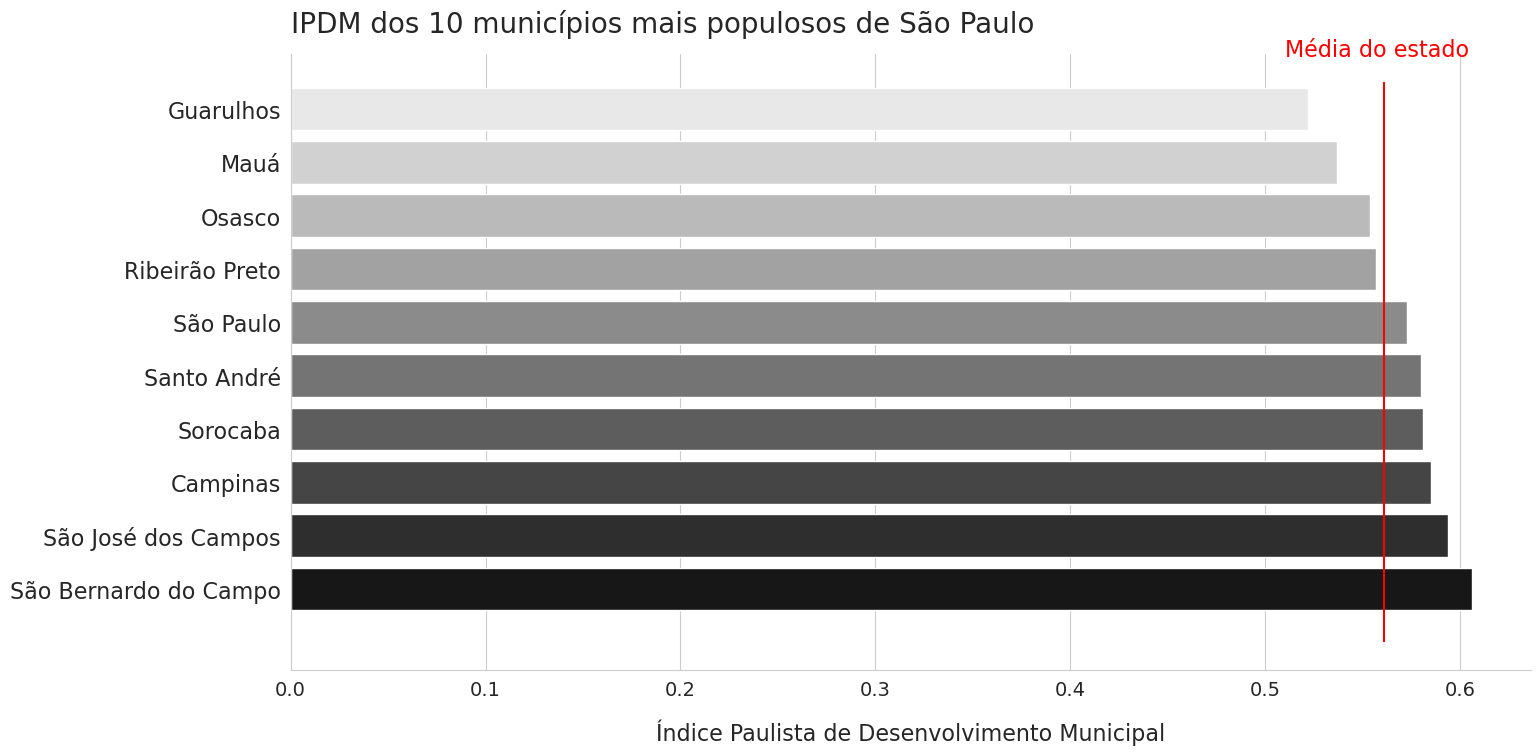

In [10]:
plt.figure(figsize=(16, 8))
sns.set_style('whitegrid')

xticks = [i / 10 for i in range(11)]

ax = sns.barplot(orient='h', x=top_10_mais_populosos['Valor'], y=top_10_mais_populosos['Municipio'], palette='gray_r')

# Ajustando o título e as labels
ax.set_title('IPDM dos 10 municípios mais populosos de São Paulo', fontsize=20, loc='left', pad=16)
ax.set_ylabel('')
ax.set_xlabel('Índice Paulista de Desenvolvimento Municipal', fontsize=16, labelpad=14)

# Ajustando os ticks do eixo x
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontdict={'fontsize': 14})

# Ajustando os ticks do eixo y
ax.set_yticks(ticks=[i for i in range(len(codigo_municipios))])
ax.set_yticklabels(top_10_mais_populosos['Municipio'], fontdict={'fontsize': 16})

ax.vlines(valor_estado, -0.5, len(codigo_municipios), color = 'r')
ax.text(0.510, -1, 'Média do estado', fontdict={'fontsize': 16, 'color': 'red'})

sns.despine()
plt.show()

### Salvando o gráfico

In [11]:
ax.figure.savefig('graficos/ipdm_10_mais_populosos.png', transparent=False, bbox_inches='tight', dpi=300)

## Analisando o município de São Paulo no ano de 2020

In [12]:
ano = 2020

In [13]:
codigo_sao_paulo = grupos_populacao.query('municipio == "São Paulo"').iloc[0]['cod_ibge']
codigo_sao_paulo

3550308

In [14]:
ipdm_sp = ipdm.query(f'cod_ibge == {codigo_sao_paulo}')
ipdm_sp

,cod_ibge,Municipio,Valor,Ano,Tipo,Valor_Estado,Indicador1,Indicador2,Indicador3,Indicador4,Indicador5
2810,3550308,São Paulo,0.542,2014,IPDM,0.535,,,,,
2811,3550308,São Paulo,0.564,2016,IPDM,0.555,,,,,
2812,3550308,São Paulo,0.580,2018,IPDM,0.578,,,,,
2813,3550308,São Paulo,0.590,2020,IPDM,0.585,,,,,
2814,3550308,São Paulo,0.573,2021,IPDM,0.561,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
50365,3550308,São Paulo,0.403,2014,Escolaridade,0.449,,,,,Indicador Escolaridade
50366,3550308,São Paulo,0.474,2016,Escolaridade,0.511,,,,,Indicador Escolaridade
50367,3550308,São Paulo,0.513,2018,Escolaridade,0.563,,,,,Indicador Escolaridade
50368,3550308,São Paulo,0.566,2020,Escolaridade,0.594,,,,,Indicador Escolaridade


In [15]:
ipdm_sp_2020 = ipdm_sp.query(f'Ano == {ano} & Valor < 1')
ipdm_sp_2020

,cod_ibge,Municipio,Valor,Ano,Tipo,Valor_Estado,Indicador1,Indicador2,Indicador3,Indicador4,Indicador5
2813,3550308,São Paulo,0.590,2020,IPDM,0.585,,,,,
50358,3550308,São Paulo,0.480,2020,Riqueza,0.439,,,,,Indicador Riqueza
50363,3550308,São Paulo,0.723,2020,Longevidade,0.722,,,,,Indicador Longevidade
50368,3550308,São Paulo,0.566,2020,Escolaridade,0.594,,,,,Indicador Escolaridade


In [31]:
pib_sp = pib.query(f'Cod_Ibge == {codigo_sao_paulo}').copy()
pib_sp['Valor'] = pib_sp['Valor'].apply(lambda x: x / 1000000000)
pib_sp_2020 = pib_sp.query(f'Ano == {ano}').copy()
pib_sp_2020['Valor'] = pib_sp_2020['Valor'].apply(lambda x: x / 1000000000)
pib_sp_2020

,Cod_Ibge,Localidade,Ano,Setor,Valor
12174,3550308,São Paulo,2020,Agropecuária,6.189638e-11
12819,3550308,São Paulo,2020,Impostos líquidos de subsídios,1.243491e-07
36684,3550308,São Paulo,2020,Indústria,5.807778e-08
37329,3550308,São Paulo,2020,PIB,7.487590e-07
61194,3550308,São Paulo,2020,Serviços (exceto administração pública),5.203580e-07
61839,3550308,São Paulo,2020,Serviços de administração pública,4.591221e-08
85704,3550308,São Paulo,2020,Valor adicionado,6.244099e-07


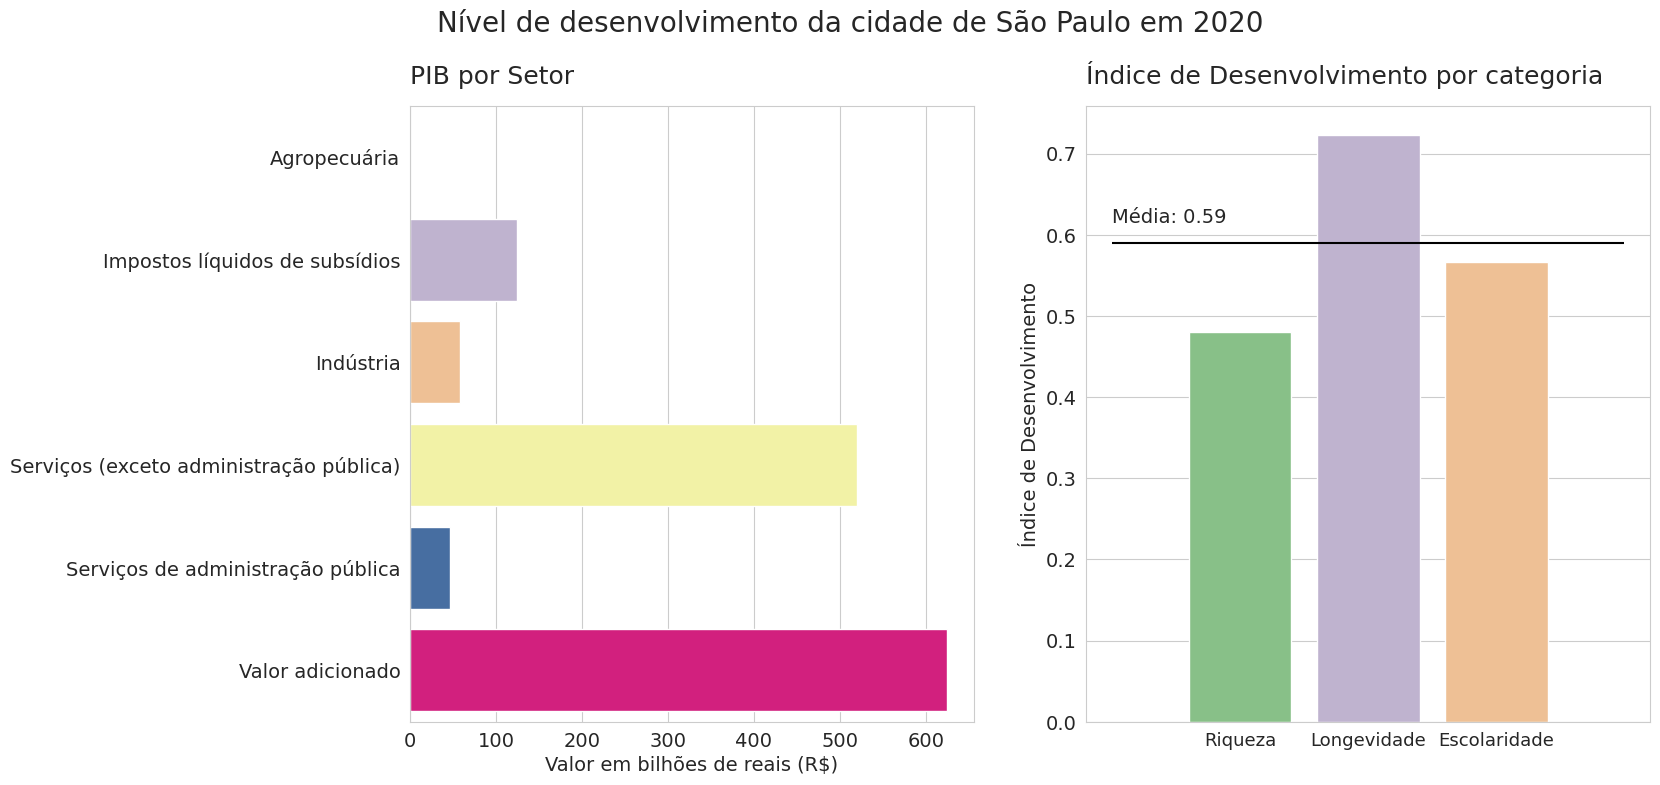

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.suptitle('Nível de desenvolvimento da cidade de São Paulo em 2020', fontsize=20, y=1, x=0.4)

sns.set_style('darkgrid')
sns.set_palette('Accent')

# Ajustando o primeiro gráfico
sns.barplot(ax=axs[0], y='Setor', x='Valor', data=pib_sp_2020.query('Setor != "PIB"'), orient='h')
axs[0].set_title('PIB por Setor', fontsize=18, pad=16, loc='left')
axs[0].set_ylabel('')
axs[0].set_xlabel('Valor em bilhões de reais (R$)', fontsize=14)
axs[0].set_yticklabels(pib_sp_2020.query('Setor != "PIB"')['Setor'], fontdict={'fontsize': 14})
axs[0].xaxis.set_tick_params(labelsize=14)

# Ajustando o segundo gráfico
sns.barplot(ax=axs[1], x='Tipo', y='Valor', data=ipdm_sp_2020.query('Tipo != "IPDM"'))
axs[1].set_title('Índice de Desenvolvimento por categoria', fontsize=18, pad=16, loc='left')
axs[1].set_xlabel('')
axs[1].set_ylabel('Índice de Desenvolvimento', fontsize=14)
axs[1].set_xticklabels(['Riqueza', 'Longevidade', 'Escolaridade'], fontdict={'fontsize': 13})
axs[1].set_xticks([0, 1, 2])
axs[1].set_yticks([i/10 for i in range(0, 8)])
axs[1].set_yticklabels([i/10 for i in range(0, 8)], fontdict={'fontsize': 14})

# Incluindo uma linha representando a média
media = ipdm_sp_2020.query('Tipo == "IPDM"').iloc[0]['Valor']
axs[1].hlines(y=media, xmin=-1, xmax=3, color='k')
axs[1].text(x=-1, y=0.615, s=f'Média: {media}', fontsize=14)

# Salvando a figura
fig.savefig('graficos/desenvolvimento_sp.png', bbox_inches='tight', transparent=False)

plt.show()

## Analisando o PIB e IPDM de São Paulo ao longo do tempo

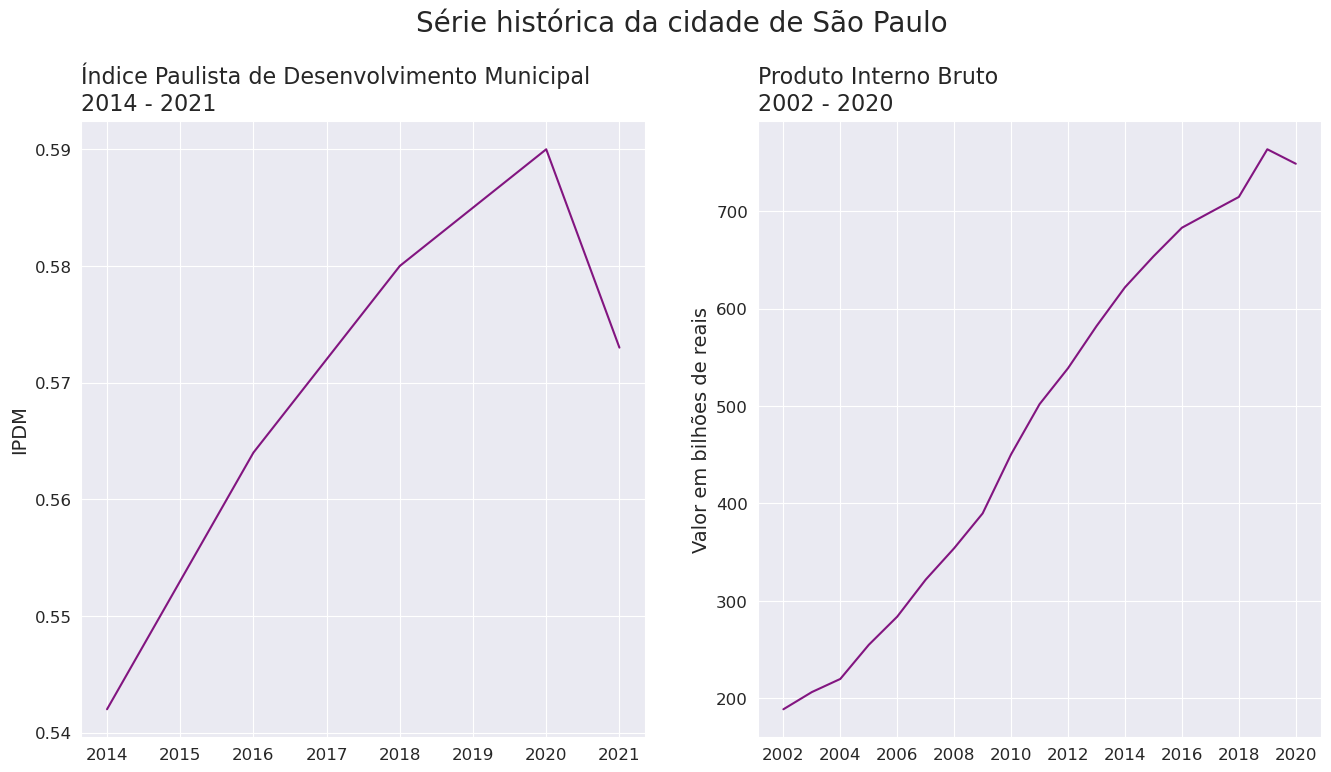

In [61]:
sns.set_style('darkgrid')
sns.set_palette('BuPu_r')

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.suptitle('Série histórica da cidade de São Paulo', fontsize=20, y=1.02)

sns.lineplot(ax=axs[0], data=ipdm_sp.query('Tipo == "IPDM" & Valor > 0 & Valor < 1'), x='Ano', y='Valor')
axs[0].set_title('Índice Paulista de Desenvolvimento Municipal\n2014 - 2021', fontsize=16, pad=8, loc='left')
axs[0].set_xlabel('')
axs[0].set_ylabel('IPDM', fontsize=14)
axs[0].xaxis.set_tick_params(labelsize=12)
axs[0].yaxis.set_tick_params(labelsize=12)

sns.lineplot(ax=axs[1], data=pib_sp.query('Setor == "PIB"'), x='Ano', y='Valor')
axs[1].set_title('Produto Interno Bruto\n2002 - 2020', fontsize=16, loc='left', pad=8)
axs[1].set_xlabel('')
axs[1].set_ylabel('Valor em bilhões de reais', fontsize=14)

xticks = [i for i in range(2002, 2021, 2)] 
axs[1].set_xticks(xticks)
axs[1].set_xticklabels(xticks, fontdict={'fontsize': 12})
axs[1].yaxis.set_tick_params(labelsize=12)

fig.savefig('graficos/serie_historica_sp.png', bbox_inches='tight', transparent=False)

plt.show()